<a href="https://colab.research.google.com/github/SriRamK345/Sales_dataset/blob/main/Sales_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data cleaning
import pandas as pd
import numpy as np
# Visualization / EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Statistical analysis
from scipy import stats
# remove warnings
import warnings
warnings.filterwarnings("ignore")
# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Cross validation
from sklearn.model_selection import cross_val_score
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Model selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
# performance of regression models
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
# statsmodels.api
import statsmodels.api as sm

### Import dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Final_Pro_Dataset/scaled_df.csv")
df.head()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,-1.219345,-1.371894,-1.215359,-1.657605,-1.417264,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.747976
1,-1.219345,-1.371894,-1.215359,-1.657605,-1.384487,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.648668
2,-1.219345,-1.371894,-1.215359,-1.657605,-1.351710,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.202083
3,-1.219345,-1.371894,-1.215359,-1.657605,-1.318932,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.312042
4,-1.219345,-1.371894,-1.215359,-1.657605,-1.286155,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.038675


In [3]:
df.shape

(420150, 18)

In [4]:
df.isnull().sum()

,0
Day,0
Month,0
Year,0
Store,0
Dept,0
Type,0
Size,0
IsHoliday,0
Temperature,0
Fuel_Price,0


In [5]:
df.columns

Index(['Day', 'Month', 'Year', 'Store', 'Dept', 'Type', 'Size', 'IsHoliday',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Weekly_Sales'],
      dtype='object')

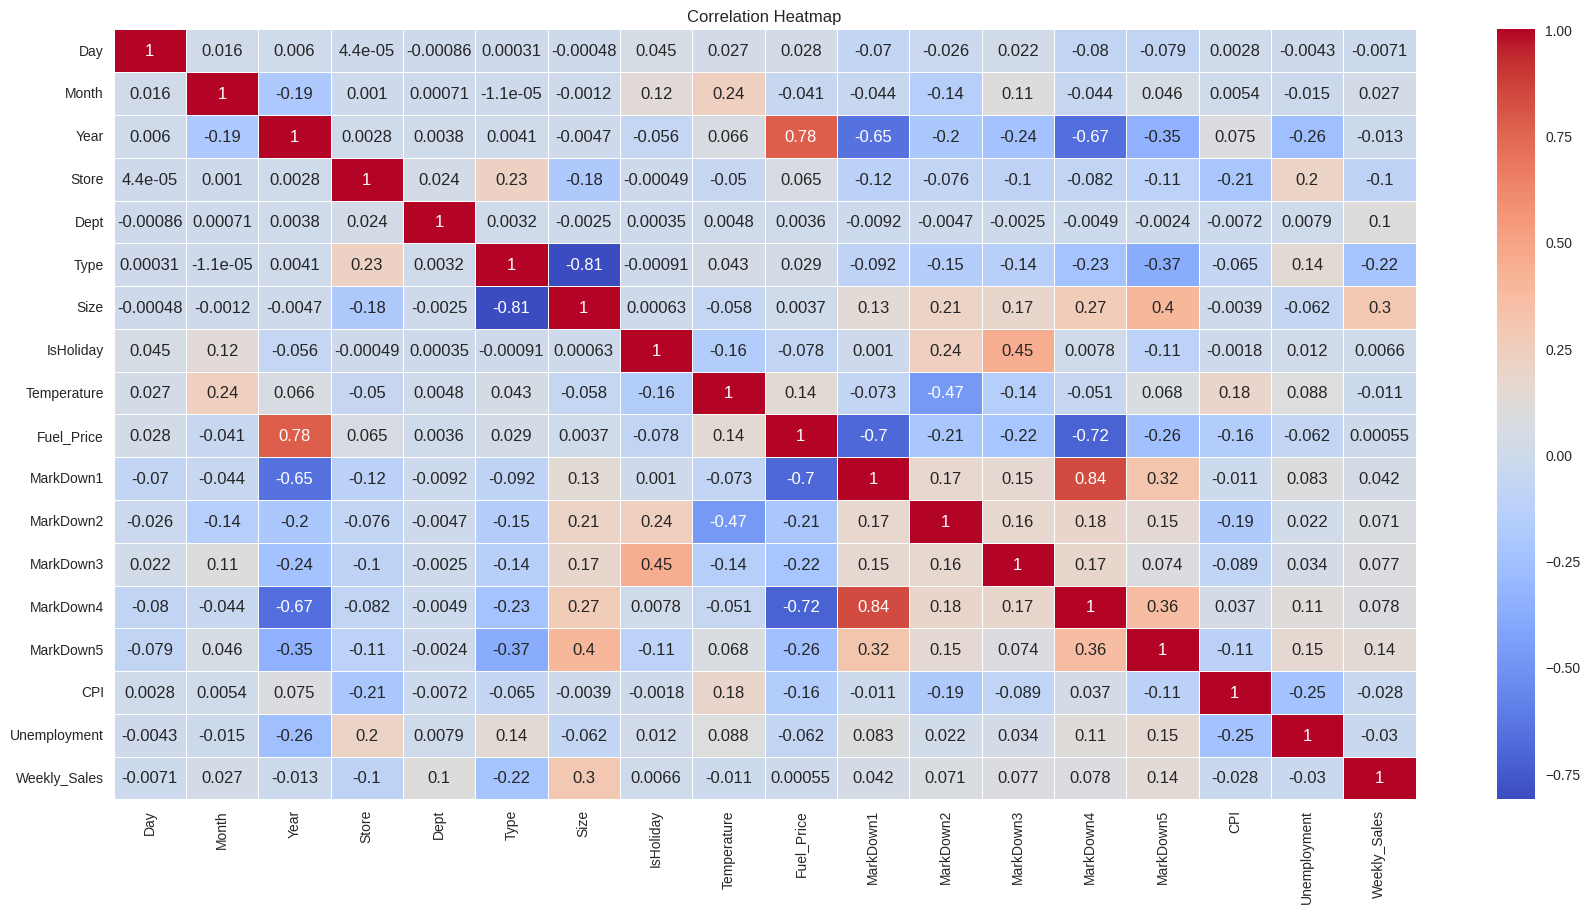

In [6]:
plt.figure(figsize=(21, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Separating Data into Test and Training Set

In [5]:
X = df.drop(["Weekly_Sales", "Day", "Month", "Year", "Fuel_Price", "IsHoliday"], axis=1)
y = df["Weekly_Sales"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
columns=X_train.columns

In [10]:
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 336120
X_test: 84030
y_train: 336120
y_test: 84030


### Modelling and Evaluation matrix

In [8]:
# evaluation_matrix

def evaluation_matrix(actual, pred):
  MAE = mean_absolute_error(actual, pred)
  MSE = mean_squared_error(actual, pred)
  RMSE = np.sqrt(mean_squared_error(actual, pred))
  SCORE = r2_score(actual, pred)
  return print("\n","r2_score:",SCORE , "\n","MAE:", MAE, "\n","MSE",MSE, "\n","RMSE", RMSE)

In [9]:
# cross valadiation
def evaluate_model_cv(model, X, y, cv=10):
    cv_scores = cross_val_score(estimator=model, X=X, y=y, cv=cv)
    mean_cv_score = cv_scores.mean() # Calculate the mean scores
    return mean_cv_score

## **Implementing Supervised Machine Learning algorithms**

### 1. Linear Regression

In [10]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train) # Fit the model

# Make predictions
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test) # Predicting the Test set results

# Evaluate the model
print("### Model Evaluation Results ###\n")

# Training set evaluation
print("\nTraining Set Evaluation:")
print("------------------------")
evaluation_matrix(y_train, y_pred_train)

# Testing set evaluation
print("\nTesting Set Evaluation:")
print("-----------------------")
evaluation_matrix(y_test, y_pred_test)


### Model Evaluation Results ###


Training Set Evaluation:
------------------------

 r2_score: 0.10559716200165936 
 MAE: 0.7508955761386199 
 MSE 0.8937676475630154 
 RMSE 0.945392853560368

Testing Set Evaluation:
-----------------------

 r2_score: 0.10393387449870761 
 MAE: 0.7524723319102867 
 MSE 0.8986113440008991 
 RMSE 0.9479511295424987


In [11]:
train_score_LR=LR_model.score(X_train,y_train)
train_score_LR

0.10559716200165936

In [12]:
test_score_LR=LR_model.score(X_test,y_test)
test_score_LR

0.10393387449870761

In [16]:
#storing 100 observations for analysis
simple_lr_pred = y_pred_test[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [17]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

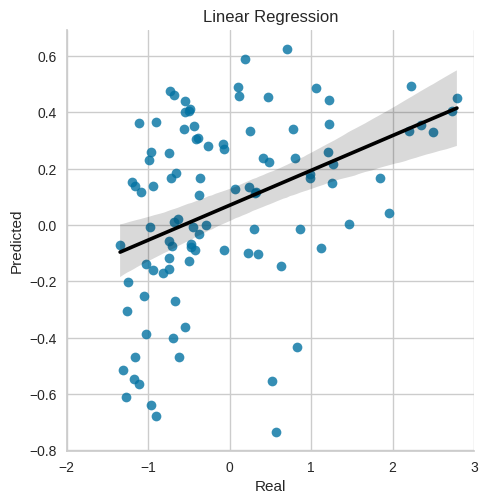

In [18]:
#visualising our predictions
plt.figure
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'})
plt.title('Linear Regression')
plt.xlabel('Real')
plt.ylabel('Predicted')
plt.xlim(-2,3)
plt.show()

### 2. Decision TreeRegressor

In [13]:
DT_model = DecisionTreeRegressor(max_depth=5)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.5131990343446531 
 MAE: 0.5266505577570534 
 MSE 0.48818369265299927 
 RMSE 0.6987014331264816


In [14]:
train_score_DT=DT_model.score(X_train,y_train)
train_score_DT

0.5170487376644753

In [15]:
test_score_DT=DT_model.score(X_test,y_test)
test_score_DT

0.5131990343446531

In [22]:
# Cross Validation score
evaluate_model_cv(DT_model, X_train, y_train, cv=10)

0.5169447875050672

In [23]:
evaluate_model_cv(DT_model, X_test, y_test, cv=10)

0.5104843901710023

### 3. RandomForestRegressor

In [16]:
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [25]:
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9684888776012407 
 MAE: 0.09757260398864542 
 MSE 0.031600627725866554 
 RMSE 0.17776565395448737


In [17]:
train_score_RF=RF_model.score(X_train,y_train)
train_score_RF

0.9955327751441145

In [18]:
test_score_RF=RF_model.score(X_test,y_test)
test_score_RF

0.9684025340920674

In [28]:
# evaluate_model_cv(RF_model, X_train, y_train, cv=5)

In [29]:
# evaluate_model_cv(RF_model, X_test, y_test, cv=5)

In [30]:
my_dist = {"Actual" : y_test , "Predict" : y_pred}
compare = pd.DataFrame(my_dist)

In [31]:
compare.sample(10)

,Actual,Predict
223778,-1.215787,-1.223810
8394,-0.265551,-0.356070
271222,0.305415,0.361831
14351,0.529367,0.747947
264827,0.577831,0.600918
414980,0.325111,0.305245
44275,-1.307387,-1.313107
103656,0.458346,0.460654
115881,0.516853,0.417992
6662,-0.456810,0.001488


## We could see that the Actual, Prediction values are approximately closed to each other and there is no such significant variation.

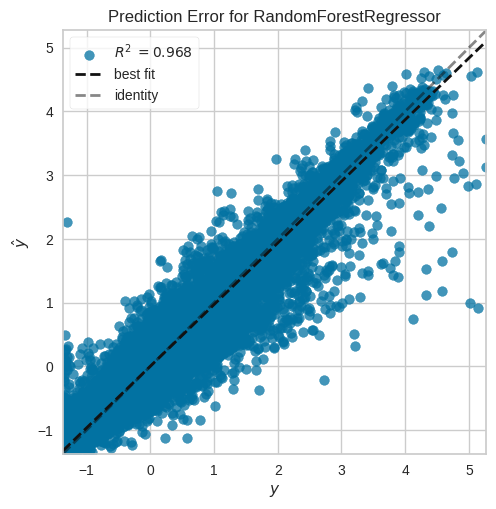

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [32]:
visualizer = PredictionError(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

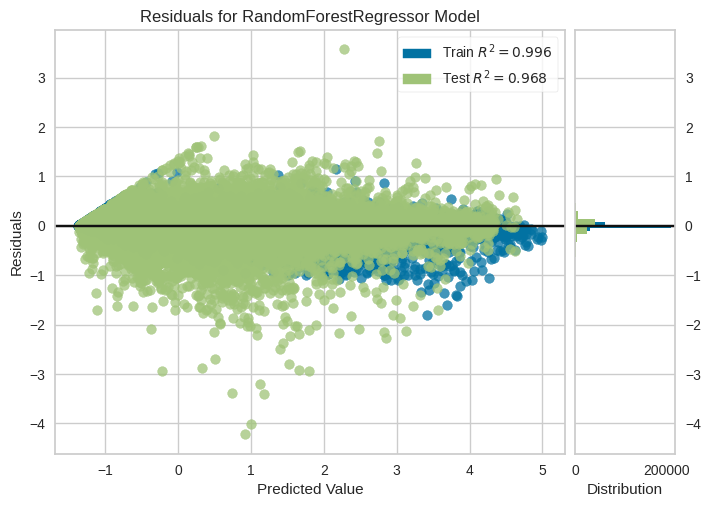

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
visualizer = ResidualsPlot(RF_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

**Random Forest With Hyper Parameter Tuning**

In [34]:
# #another script that takes toooo long, to find the right parameters for RFR
# RF_mod=RandomForestRegressor()

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid_cv = RandomizedSearchCV(estimator=RF_mod, param_distributions=params, n_iter=20, verbose=True, cv=10)
# grid_cv.fit(X_train, y_train)
# grid_cv.best_params_

### 4. XGBRegressor

In [19]:
from xgboost import XGBRegressor
XGB_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9114393173504974 
 MAE: 0.203967827667695 
 MSE 0.08881223360249861 
 RMSE 0.2980138144490933


In [20]:
train_score_XGB= XGB_model.score(X_train,y_train)
train_score_XGB

0.9131016203661798

In [21]:
test_score_XGB= XGB_model.score(X_test,y_test)
test_score_XGB

0.9114393173504974

In [ ]:
# evaluate_model_cv(XGB_model, X_train, y_train, cv=10)

In [ ]:
# evaluate_model_cv(XGB_model, X_test, y_test, cv=10)

### 5. ExtraTreesRegressor

In [22]:
ET_model=ExtraTreesRegressor()
ET_model.fit(X_train,y_train)
y_pred = ET_model.predict(X_test)
evaluation_matrix(y_test, y_pred)


 r2_score: 0.9701888042167545 
 MAE: 0.09566669203768406 
 MSE 0.02989587257756193 
 RMSE 0.1729042294958742


In [23]:
train_score_ET= ET_model.score(X_train,y_train)
train_score_ET

1.0

In [24]:
test_score_ET= ET_model.score(X_test,y_test)
test_score_ET

0.9701888042167545

In [43]:
# evaluate_model_cv(ET_model, X_train, y_train, cv=5)

In [44]:
# evaluate_model_cv(ET_model, X_test, y_test, cv=5)

In [45]:
my_dist = {"Actual" : y_test , "Predict" : y_pred}
compare = pd.DataFrame(my_dist)
compare.sample(10)

,Actual,Predict
336035,-0.951779,-0.925344
46656,0.242649,0.254285
363781,-0.309861,-0.379597
55166,1.078608,1.288593
369485,0.567109,0.542602
155112,-1.039124,-0.997620
316468,-0.638696,-0.645198
100879,0.779634,1.616176
342732,1.390888,1.504663
229117,-0.733910,-0.705852


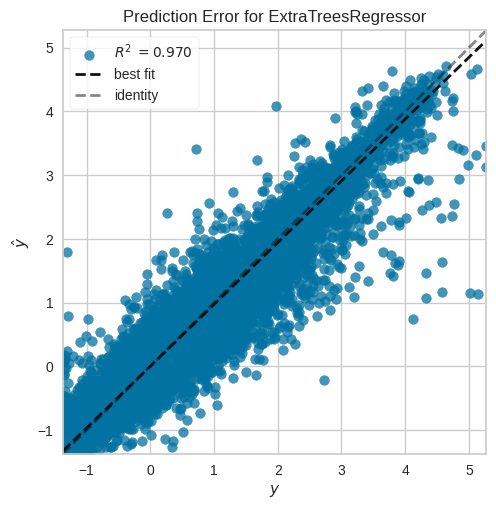

<Axes: title={'center': 'Prediction Error for ExtraTreesRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:
visualizer = PredictionError(ET_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

In [ ]:
visualizer = ResidualsPlot(ET_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.show()

**ExtraTreesRegressor With Hyper Parameter Tuning**

In [ ]:
# ETR_model = ExtraTreesRegressor()

# # Define the hyperparameters and the range of values to search
# params = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'criterion': ['mse', 'mae']}

# grid_cv = RandomizedSearchCV(estimator=ETR_model,param_distributions=params,n_iter=100,cv=5, verbose=2,random_state=42,n_jobs=-1)

# Fit the model on the training data
# grid_cv.fit(X_train, y_train)
# grid_cv.fit(X_train, y_train)
# grid_cv.best_params_

In [25]:
def feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

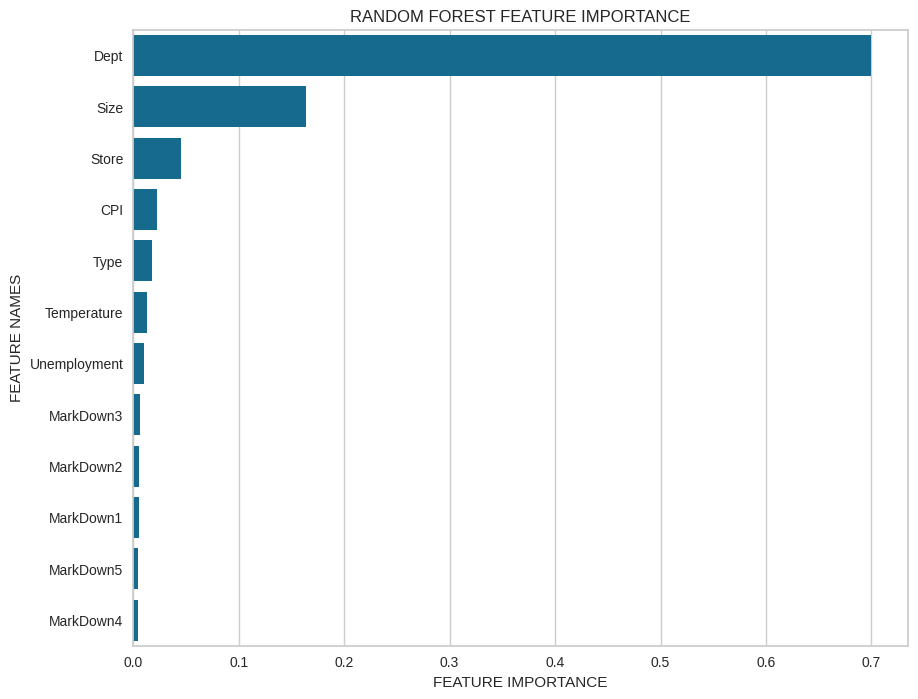

In [26]:
feature_importance(RF_model.feature_importances_,columns[:],'RANDOM FOREST')

**Dept, Size, Store these three bars most important features in our sales prediction.**

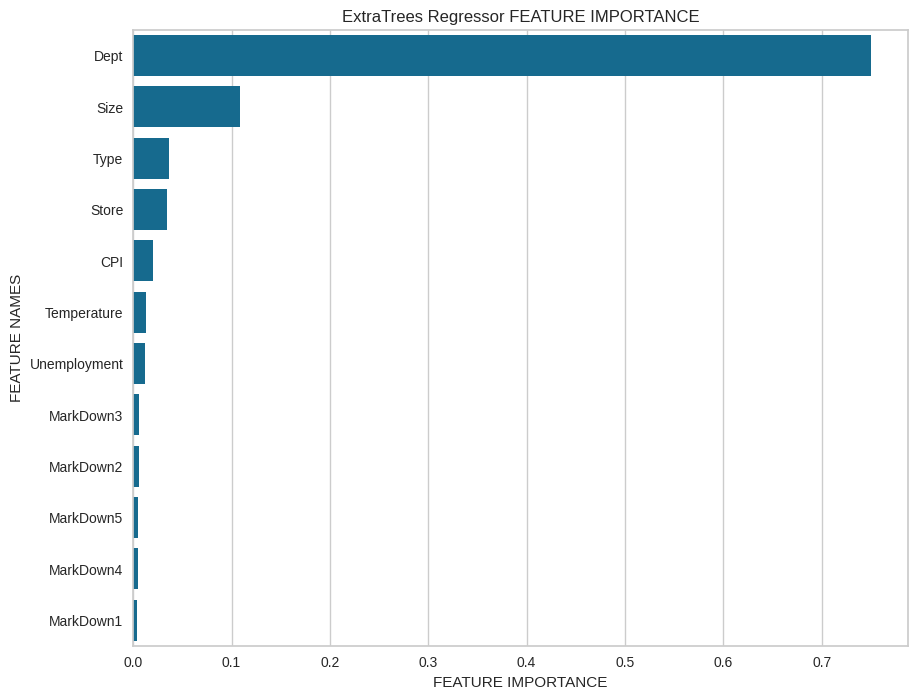

In [27]:
feature_importance(ET_model.feature_importances_,columns[:],'ExtraTrees Regressor')

**Dept, Size, type, Store these four bars most important features in our sales prediction accorging to ExtraTreesRegressor.**

In [28]:
score_df = pd.DataFrame({'Train_Score':[train_score_LR,train_score_DT,train_score_RF,train_score_XGB,train_score_ET],
                         'Test_Score':[test_score_LR,test_score_DT,test_score_RF,test_score_XGB,test_score_ET]},
                        index=['Linear Regression','Decision Tree','Random Forest Regression','XGBoost Regression','ExtraTreesRegressor'],)

In [29]:
score_df

,Train_Score,Test_Score
Linear Regression,0.105597,0.103934
Decision Tree,0.517049,0.513199
Random Forest Regression,0.995533,0.968403
XGBoost Regression,0.913102,0.911439
ExtraTreesRegressor,1.000000,0.970189


In [54]:
# import pickle

# # Save the model to a file
# with open('ET_model.pkl', 'wb') as file:
#     pickle.dump(ET_model, file)

## **Conclusion**
**The ExtraTreesRegressor (ET_model) performs slightly better overall based on the evaluation metrics provided. It has a marginally higher R² score and lower values for MAE, MSE, and RMSE compared to the RandomForestRegressor (RF_model). Therefore, ET_model is the preferred model among the two based on these performance metrics.**

**Since "Dept," "Size," "Type," and "Store" are critical, consider these variables in your strategic planning. For example, optimizing store layouts, tailoring marketing strategies by department, and considering store size in inventory planning might enhance sales performance.**

In [5]:
df_unscaled = pd.read_csv("/content/final_df (1).csv")
df_unscaled.shape

(420212, 20)

In [6]:
df["Date"] = pd.to_datetime(df_unscaled["Date"])

In [7]:
df.head()

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Date
0,-1.219345,-1.371894,-1.215359,-1.657605,-1.417264,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.747976,2010-02-05
1,-1.219345,-1.371894,-1.215359,-1.657605,-1.384487,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.648668,2010-02-05
2,-1.219345,-1.371894,-1.215359,-1.657605,-1.351710,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,0.202083,2010-02-05
3,-1.219345,-1.371894,-1.215359,-1.657605,-1.318932,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.312042,2010-02-05
4,-1.219345,-1.371894,-1.215359,-1.657605,-1.286155,-0.88462,0.238884,-0.2749,-0.963941,-1.720504,1.258858,0.24315,0.02662,1.681679,1.260649,1.018367,0.194551,1.038675,2010-02-05


In [8]:
df.shape

(420150, 19)

In [9]:
print(df['Date'].min(),'initial date')
print(df['Date'].max(),'final date')

2010-02-05 00:00:00 initial date
2012-10-26 00:00:00 final date


In [10]:
# Define the split date for training and testing
split_date = '2012-07-26'

In [11]:
df = df.sort_values(by='Date')

In [12]:
# Split the data into training and testing sets
train = df[df['Date'] < split_date]
test = df[(df['Date'] >= split_date) & (df['Date'] <= '2012-10-26')]

In [13]:
# Features and target variable for training and testing
X_train = train.drop(columns=['Weekly_Sales', 'Date'])
y_train = train['Weekly_Sales']

In [14]:
X_test = test.drop(columns=['Weekly_Sales', 'Date'])
y_test = test['Weekly_Sales']

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize and train the model
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

# Predict the test set (last 3 months)
y_pred = model.predict(X_test)


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.015437885196417195
R-Squared: 0.9844120182111905


In [17]:
# Assuming the next quarter is Q1 of 2024
future_dates = pd.date_range(start='2012-07-26', end='2012-10-26', freq='W')

# Create a DataFrame for future dates
future_df = pd.DataFrame({'Date': future_dates})

# Generate the same features as your training set
# For example, adding 'Year', 'Month', 'Day', etc.
future_df['Year'] = future_df['Date'].dt.year
future_df['Month'] = future_df['Date'].dt.month
# Add other feature engineering steps here

# Drop the Date column if it was dropped in training
X_future = future_df.drop(columns=['Date'])
X_future

,Year,Month
0,2012,7
1,2012,8
2,2012,8
3,2012,8
4,2012,8
5,2012,9
6,2012,9
7,2012,9
8,2012,9
9,2012,9


In [19]:
df.tail(1)

,Day,Month,Year,Store,Dept,Type,Size,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales,Date
420149,1.179903,1.094894,1.294339,1.783292,1.76215,0.615925,-0.303696,-0.2749,-0.067363,1.136413,-0.805025,-0.785647,-0.244684,-1.10228,-2.082568,0.538637,0.491946,-0.931195,2012-10-26


In [23]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [21]:
future_dates = pd.date_range(start='2012-07-26', end='2012-10-26', freq='W') # Changed pd.df to pd.date_range
future_df = pd.DataFrame({'Date': future_dates}) # Changed pd.df to pd.DataFrame
# Input
future_df['Store'] = 1.783292
future_df['Dept'] = 1.76215
future_df['Type'] = 0.615925
future_df['Size'] = -0.303696
future_df['IsHoliday'] = -0.2749
future_df['Temperature'] = -0.067363
future_df['Fuel_Price'] = 1.136413
future_df['CPI'] = 0.538637
future_df['Unemployment'] = 0.491946

X_future = future_df.drop(columns=['Date'])


       Store     Dept      Type      Size  IsHoliday  Temperature  Fuel_Price  \
0   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
1   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
2   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
3   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
4   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
5   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
6   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
7   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
8   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
9   1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
10  1.783292  1.76215  0.615925 -0.303696    -0.2749    -0.067363    1.136413   
11  1.783292  1.76215  0.615

In [ ]:
# Load your pre-trained model
model = pickle.load('path_to_your_model.pkl')  # Adjust the path as necessary

# Predict weekly sales
predictions = model.predict(X_future)

# Add predictions to future_df for better visibility
future_df['Predicted_Weekly_Sales'] = predictions

# Print or save the predictions
print(future_df[['Date', 'Predicted_Weekly_Sales']])